Requirements:
1. Create a Jupyter notebook for exploratory data analysis (EDA) of data provided. <br>
    a. Make sure to add ample comments to convey what you are doing and why. <br>
    b. Try to see if there are valuable insights for duration of same service or method name <br>
    c. One trace can have multiple spans and some spans can have parent spans

2. Once you complete EDA, briefly answer: <br>
    a. What algorithm, machine learning or AI approaches would you take to find anomalies in the duration of a span? And why do you think that approach is a
good approach?

3. You have 1 week to complete the challenge.
4. Once completed, upload your EDA notebook to Github and share the link along with an
answer to the above question (point #2). <br>
    a. Reply back to the email from neel@opsfree.com    

## About Dataset:
- **Timestamp**: Time of occurrence of the event
- **traceID**: Unique ID of an execution path through the system
- **spanID**: Unique ID associated with execution of a logical unit
- **parentSpanID**: spanID of parent span that called a given span
- **serviceName**: Name of microservice associated with the span
- **Name**: Method/function/endpoint name associated with the span
- **durationNano**: Time taken in nanoseconds to execute the span

## **Step 1:** *Import libraries*

In [1]:
! pip install gdown


In [53]:
import pandas as pd
import numpy as np
import gdown
import seaborn as sns
import matplotlib.pyplot as plt

## **Step 2:** *Read Dataset from `Google Drive` Link*

In [3]:
# Google Drive file URL
url = 'https://drive.google.com/file/d/1XGcvG9hlzRXKBBK5QKPMGJqoJS_Ul2Bf/'

# Download the file
output = 'Dataset/dataset.csv'  # You can change the output filename if needed
gdown.download(url, output, quiet=False)

c:\Users\visha\anaconda3\Lib\site-packages\gdown\parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1XGcvG9hlzRXKBBK5QKPMGJqoJS_Ul2Bf/
To: c:\Users\visha\OneDrive\Desktop\Artifical Intelligence\Test for Job - internship\OpsFree LLC - Data Science Internship\Dataset\dataset.csv
82.5kB [00:00, 2.64MB/s]


'Dataset/dataset.csv'

## **Step 3:** *Load dataset*

In [4]:
data = pd.read_csv(r"Dataset\traces_data - traces_data.csv")

In [5]:
data

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,2023-11-23 4:42:33,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,NaN,featureflagservice,/,887477,NaN
1,2023-11-23 4:42:33,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,2023-11-23 4:42:34,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,NaN,frontend-proxy,ingress,213000,NaN
3,2023-11-23 4:42:37,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,NaN,frontend-proxy,ingress,602000,NaN
4,2023-11-23 4:42:40,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,NaN,frontend-proxy,ingress,556000,NaN
...,...,...,...,...,...,...,...,...
183610,2023-11-23 3:44:52,cc3f285a2ef094d4ba7582b1d5d47882,ebf0df7adc41ca4d,53e18cd5258047f5,recommendationservice,/oteldemo.ProductCatalogService/ListProducts,1016311,grpc
183611,2023-11-23 3:44:54,be4a70fee4913f3cf56b1c64228bcdb5,0975afe20d7368d2,7a1c6f8d9bff070f,currencyservice,CurrencyService/Convert,34953,grpc
183612,2023-11-23 3:44:54,be4a70fee4913f3cf56b1c64228bcdb5,96139b9d0d16639a,8f0b4f79ec0d0005,currencyservice,CurrencyService/Convert,25660,grpc
183613,2023-11-23 3:44:54,be4a70fee4913f3cf56b1c64228bcdb5,b1321d3db08e86d3,73e8e9281d421a7d,quoteservice,calculate-quote,5401,NaN


In [6]:
data.columns

Index(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name',
       'durationNano', 'Unnamed: 7'],
      dtype='object')

In [7]:
data.shape

(183615, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Timestamp     183615 non-null  object
 1   traceID       183615 non-null  object
 2   spanID        183615 non-null  object
 3   parentSpanID  141834 non-null  object
 4   serviceName   183615 non-null  object
 5   Name          183615 non-null  object
 6   durationNano  183615 non-null  int64 
 7   Unnamed: 7    80498 non-null   object
dtypes: int64(1), object(7)
memory usage: 11.2+ MB


## **Step 4:** *Fix Timestamp column datatype to datetime*
1. Ensures that all values in the "Timestamp" column are of the same data type, making the dataset consistent and easier to work with. <br>
1. Converting the "Timestamp" column to datetime allows for accurate time-based analysis. It enables you to perform operations like sorting, filtering, and calculating time intervals correctly.

In [9]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     183615 non-null  datetime64[ns]
 1   traceID       183615 non-null  object        
 2   spanID        183615 non-null  object        
 3   parentSpanID  141834 non-null  object        
 4   serviceName   183615 non-null  object        
 5   Name          183615 non-null  object        
 6   durationNano  183615 non-null  int64         
 7   Unnamed: 7    80498 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 11.2+ MB


## **Step 5:** *Sorting the dataframe based on the `Timestamp Column`*

* Arrange the data in chronological order, making it easier to understand the sequence of events over time.
* Facilitate time-based analysis, enabling identification of trends, patterns, and anomalies more effectively.

In [11]:
sorted_data = data.sort_values(by='Timestamp', ascending=True ).reset_index(drop=True)

In [12]:
sorted_data

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,2023-11-23 02:34:49,70b8de8cb2d175754372fd02a00540a3,4e558b1a789cda1f,NaN,paymentservice,fs statSync,6400,NaN
1,2023-11-23 02:34:49,a5915e72b96bcb479aeeaf0cf4674daf,23dadcfbbf45ea28,NaN,paymentservice,fs realpathSync,16640,NaN
2,2023-11-23 02:34:49,51700d8d6efacf9ed6c2a7d288e9da61,677a042bf0decb55,NaN,paymentservice,fs statSync,8192,NaN
3,2023-11-23 02:34:49,47edd772b58bbbcf4f8eab7b3d65358e,eb1c0cd315d79f54,NaN,paymentservice,fs readFileSync,15360,NaN
4,2023-11-23 02:34:49,c090233d366d7bc5d661704154aa1d69,4a76e0fe14288445,NaN,paymentservice,fs statSync,9472,NaN
...,...,...,...,...,...,...,...,...
183610,2023-11-23 04:58:37,bbed5c32bcded976a9ae6678bbc3de6d,e5257c21393aacc6,NaN,featureflagservice,/,881835,NaN
183611,2023-11-23 04:59:07,4edbc817d1f9d5eb3b5471683218f7a0,54226ba227ee38f9,NaN,featureflagservice,/,1034771,NaN
183612,2023-11-23 04:59:07,4edbc817d1f9d5eb3b5471683218f7a0,753cb9fb5bddf0a3,54226ba227ee38f9,featureflagservice,featureflagservice.repo.query:featureflags,543243,NaN
183613,2023-11-23 04:59:37,6d4a9dd446c6a06765cac733a96c16a4,3bb53ecf8744126f,f9825a9c6013e202,featureflagservice,featureflagservice.repo.query:featureflags,484689,NaN


## **Step 6:** *Analyzing the duration of data collection in the dataset*

the following insights were derived:

- **Duration of Data Collection**: The data was collected over a duration of approximately 2 hours and 24 minutes.

- **Start and End Timestamps**: Data collection commenced on November 23, 2023, at 2:34 AM, and concluded on the same day at 4:59 AM.

Understanding the temporal context of the dataset's collection period is essential for interpreting the insights and deriving meaningful conclusions from the data.



In [13]:
# Start and end timestamp to understand the time duration of dataset
print("Starting Timing: ", sorted_data['Timestamp'][0])
print("Ending Timing: ", sorted_data['Timestamp'][len(sorted_data['Timestamp']) -1])
print("Total Duration: ", sorted_data['Timestamp'][len(sorted_data['Timestamp']) -1]-sorted_data['Timestamp'][0])

Starting Timing:  2023-11-23 02:34:49
Ending Timing:  2023-11-23 04:59:37
Total Duration:  0 days 02:24:48


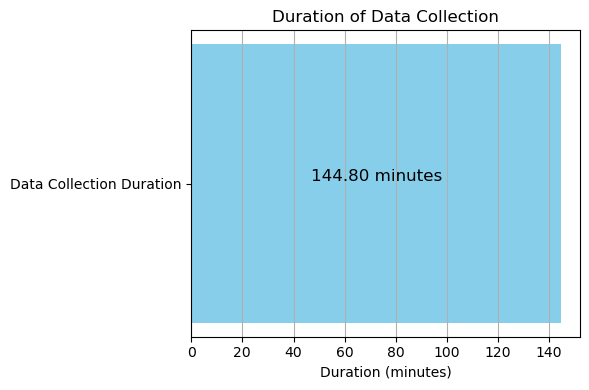

In [14]:
# Calculate duration in minutes
duration = sorted_data['Timestamp'][len(sorted_data['Timestamp']) -1]-sorted_data['Timestamp'][0]
duration_minutes = duration.total_seconds() / 60

# Plotting the duration
plt.figure(figsize=(6, 4))
plt.barh(y=['Data Collection Duration'], width=duration_minutes, color='skyblue')
plt.xlabel('Duration (minutes)')
plt.title('Duration of Data Collection')
plt.grid(axis='x')

# Annotate the duration on the plot
plt.text(duration_minutes / 2, 0, f'{duration_minutes:.2f} minutes', ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


## **Step 7:** *Find out the total null value in each columns*

In [15]:
data.shape

(183615, 8)

In [16]:
data.isnull().sum()

Timestamp            0
traceID              0
spanID               0
parentSpanID     41781
serviceName          0
Name                 0
durationNano         0
Unnamed: 7      103117
dtype: int64

## **Step 8:** *Fill the null value with mode*

In [17]:
mode = data['parentSpanID'].mode().values[0]

In [18]:
data['parentSpanID'].fillna(mode, inplace=True)

In [19]:
data.isnull().sum()

Timestamp            0
traceID              0
spanID               0
parentSpanID         0
serviceName          0
Name                 0
durationNano         0
Unnamed: 7      103117
dtype: int64

## **Step 9:** *Perform EDA*

In [20]:
data.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,2023-11-23 04:42:33,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,d1783a9be93930b7,featureflagservice,/,887477,NaN
1,2023-11-23 04:42:33,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,2023-11-23 04:42:34,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,d1783a9be93930b7,frontend-proxy,ingress,213000,NaN
3,2023-11-23 04:42:37,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,d1783a9be93930b7,frontend-proxy,ingress,602000,NaN
4,2023-11-23 04:42:40,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,d1783a9be93930b7,frontend-proxy,ingress,556000,NaN


In [21]:
data.columns

Index(['Timestamp', 'traceID', 'spanID', 'parentSpanID', 'serviceName', 'Name',
       'durationNano', 'Unnamed: 7'],
      dtype='object')

#### **Column 1**: *Timestamp*
> Timestamp: This column records the time of occurrence of each event. It provides a chronological reference for when each action or event took place within the system.

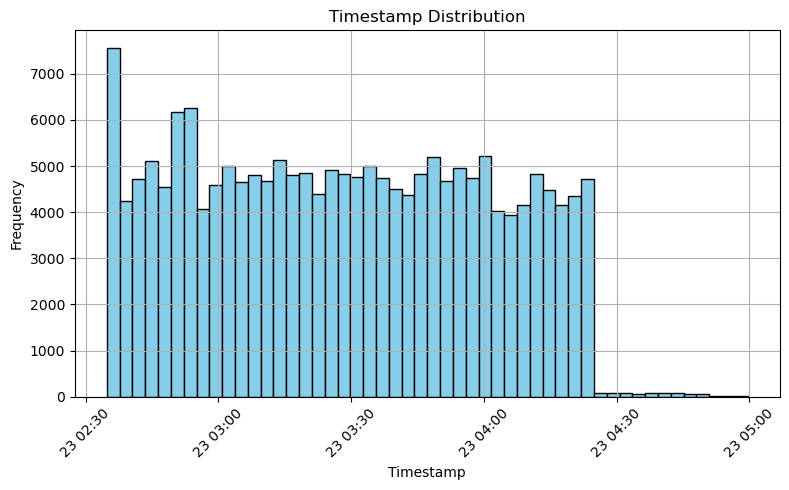

In [22]:
# Plotting the histogram
plt.figure(figsize=(8, 5))
plt.hist(data['Timestamp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Column 2**: *traceID*
> traceID: Each execution path through the system is assigned a unique identifier called traceID. This helps in tracing and correlating logs or events that are part of the same logical execution flow across different microservices or components.

In [23]:
data.traceID

0         d8d992638d73274d0a6710a1f9d17f93
1         d8d992638d73274d0a6710a1f9d17f93
2         fab7ab123d61c8d7d71062fc44ffb87e
3         39a34f6b196aa69cdd5364bfc73b35b4
4         61e0ffa4c695a832b05f406999cf319c
                        ...               
183610    cc3f285a2ef094d4ba7582b1d5d47882
183611    be4a70fee4913f3cf56b1c64228bcdb5
183612    be4a70fee4913f3cf56b1c64228bcdb5
183613    be4a70fee4913f3cf56b1c64228bcdb5
183614    be4a70fee4913f3cf56b1c64228bcdb5
Name: traceID, Length: 183615, dtype: object

In [24]:
data.traceID.value_counts()

traceID
1f2fae8467906870310cea93db646b1b    62
baf28a33f67b3fdc32a23efc21ebe1ca    62
1a22bbee3f36988839bd3a3942702489    62
61e54cdbd7d9de6aa0208c2cc5953564    62
149a8568251d5fe3a3063325a295d449    62
                                    ..
f0e1817ed4f9b6a55cc562663cadce94     1
42c2ff9c6dbc49086f2b167aebe3763c     1
52249464b186bf19c41ae4ce8c59f374     1
7a9e56b233c638a999c571f02267e713     1
067f3d281447b5b3773e7d70ede6a0b5     1
Name: count, Length: 41792, dtype: int64

#### **Column 3**: *spanID*
> spanID: A span represents a unit of work in the system. spanID is a unique identifier associated with the execution of each individual unit of work or operation within the system.

In [25]:
data.spanID

0         0d87dcf5ea5aeaab
1         bd0a6f75f1a901b7
2         fe4acd4c8a763d24
3         b3c68f9f4a73524b
4         b204b9bce1b3ac35
                ...       
183610    ebf0df7adc41ca4d
183611    0975afe20d7368d2
183612    96139b9d0d16639a
183613    b1321d3db08e86d3
183614    ae64d281880bfed7
Name: spanID, Length: 183615, dtype: object

#### **Columns 4:** *parentSpanID*
> parentSpanID: For distributed systems or microservices architecture where operations may span across multiple services, parentSpanID indicates the spanID of the parent span that called a given span. It helps in understanding the hierarchical relationship between different spans within the system.

In [26]:
data.parentSpanID.value_counts()

parentSpanID
d1783a9be93930b7    41840
d7d27bf87b2ccf8b       19
db11eaa9e76ff8aa       17
988447251867d0ad       11
5d2c7928c1efc73e       11
                    ...  
5af930f24ae858d9        1
ccda23ec9696b657        1
bcd1a97fb3161999        1
151e34f4ab9bc315        1
2f7d3638d3ad3342        1
Name: count, Length: 107233, dtype: int64

#### **Column 5**: *serviceName*
> serviceName: This column records the name of the microservice or component associated with each span. It helps in identifying which microservice or component is responsible for executing a particular operation.

In [27]:
data.serviceName.value_counts()

serviceName
frontend                 65758
cartservice              25834
productcatalogservice    20934
loadgenerator            16852
checkoutservice          13750
featureflagservice        7623
recommendationservice     6032
frontend-proxy            4836
emailservice              4016
adservice                 3523
paymentservice            3337
shippingservice           3012
quoteservice              3010
currencyservice           2860
accountingservice         1004
frauddetectionservice     1004
frontend-web               230
Name: count, dtype: int64

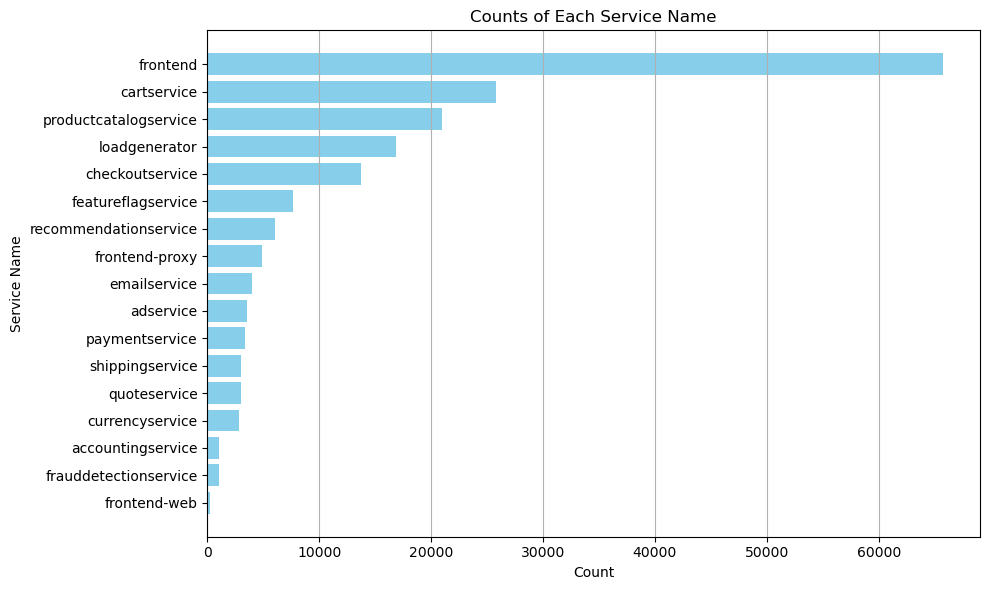

In [28]:
service_names = data.serviceName.value_counts().index
counts = data.serviceName.value_counts().values
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(service_names, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Service Name')
plt.title('Counts of Each Service Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x')  # Add gridlines on x-axis only
plt.tight_layout()
plt.show()

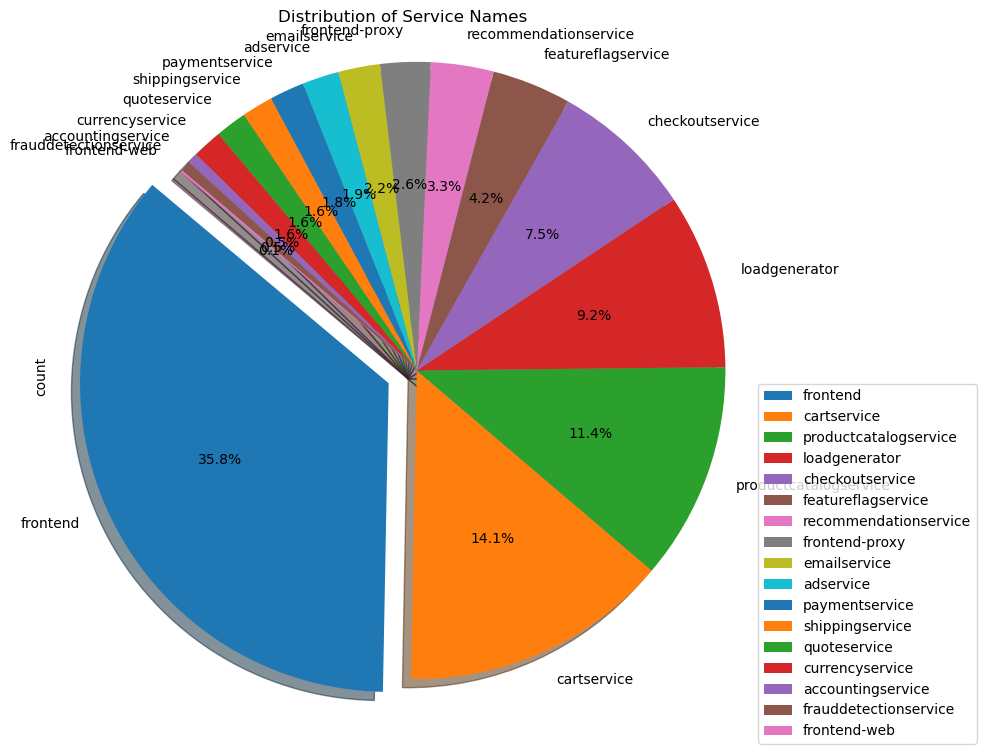

In [29]:
# Calculate value counts for each service name
service_counts = data["serviceName"].value_counts()

# Define explode for highlighting slices
explode = [0.1 if i == 0 else 0 for i in range(len(service_counts))]  # Explode the first slice

# Plotting the pie chart
plt.figure(figsize=(9, 9))
service_counts.plot.pie(autopct="%1.1f%%", explode=explode, startangle=140, shadow=True)
plt.title("Distribution of Service Names")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(service_counts.index, loc="best", bbox_to_anchor=(1, 0.5))  # Add legend with service names
plt.show()


#### **Column 6:** *Name*
> Name: This column contains the name of the method, function, or endpoint associated with each span. It provides information about the specific operation or task being executed within the microservice or component.

In [30]:
data.Name.value_counts()

Name
HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name: count, Length: 66, dtype: int64

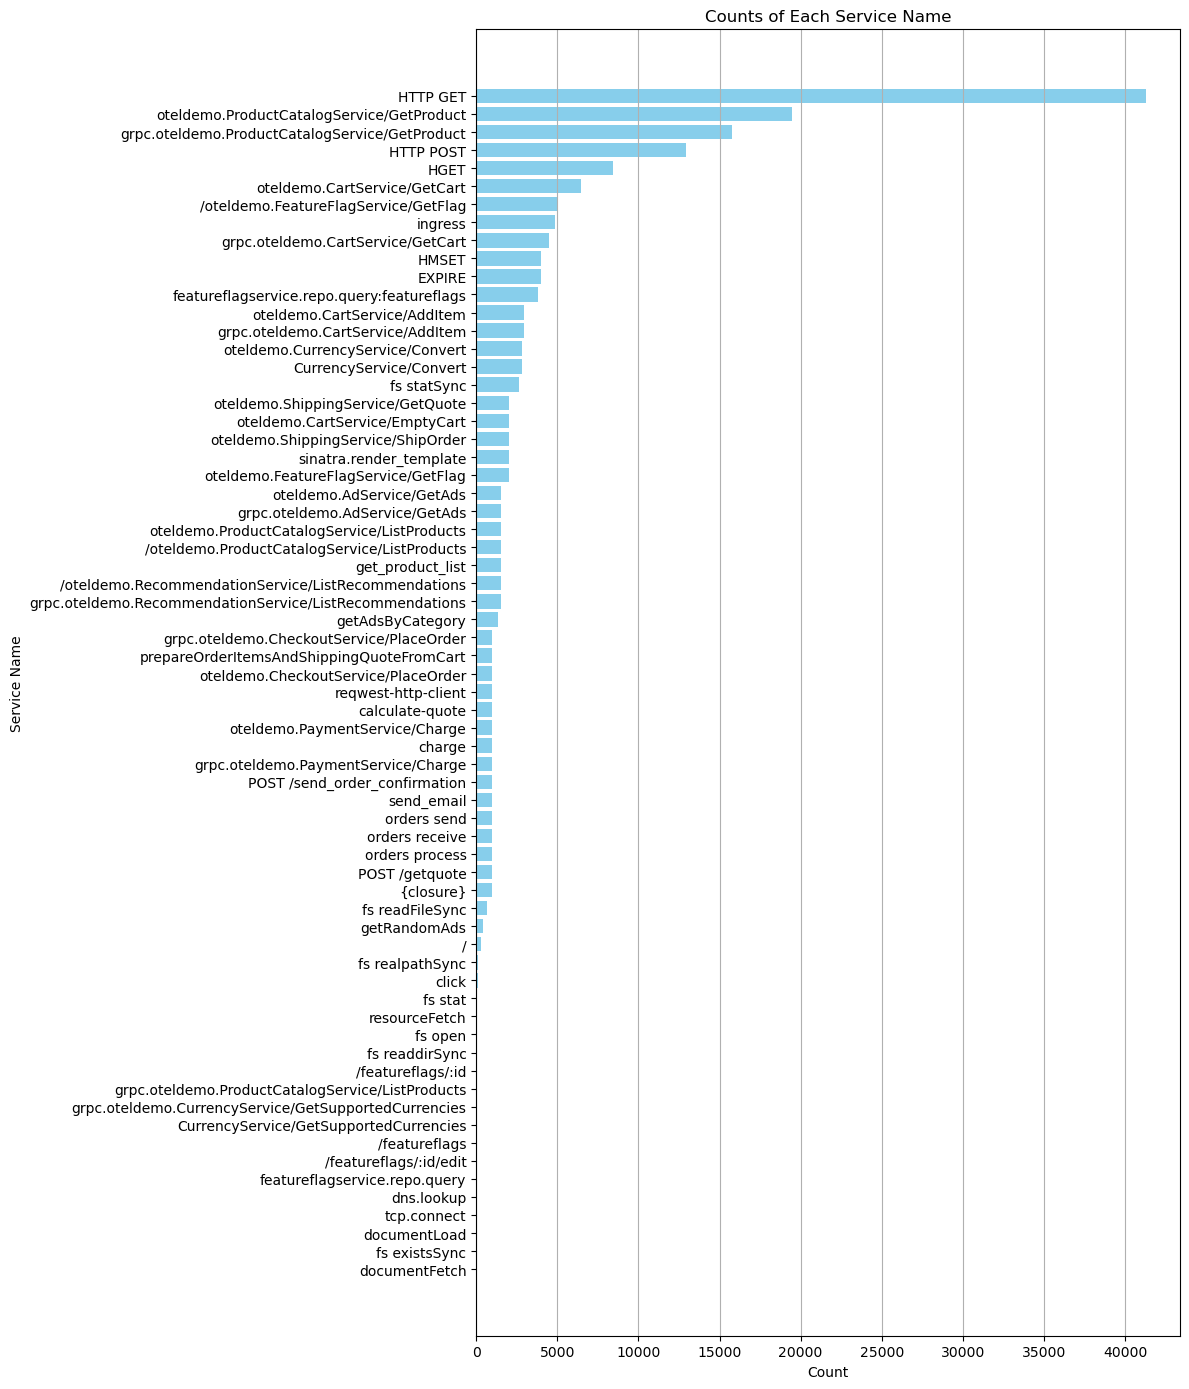

In [31]:
service_names = data.Name.value_counts().index
counts = data.Name.value_counts().values
# Plotting
plt.figure(figsize=(12, 14))
plt.barh(service_names, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Service Name')
plt.title('Counts of Each Service Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.grid(axis='x')  # Add gridlines on x-axis only
plt.tight_layout()
plt.show()

#### **Column 7:** *durationNano*
> durationNano: This column records the time taken in nanoseconds to execute each span. It provides insights into the performance and efficiency of different operations within the system.

In [32]:
data.durationNano

0          887477
1          481634
2          213000
3          602000
4          556000
           ...   
183610    1016311
183611      34953
183612      25660
183613       5401
183614      30845
Name: durationNano, Length: 183615, dtype: int64

#### **Column 8:** *Unnamed: 7*

In [33]:
data['Unnamed: 7']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
183610    grpc
183611    grpc
183612    grpc
183613     NaN
183614    grpc
Name: Unnamed: 7, Length: 183615, dtype: object

In [34]:
data['Unnamed: 7'].value_counts()

Unnamed: 7
grpc    80498
Name: count, dtype: int64

In [35]:
data['Unnamed: 7'].isnull().sum()

103117

In [36]:
data.head()

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7
0,2023-11-23 04:42:33,d8d992638d73274d0a6710a1f9d17f93,0d87dcf5ea5aeaab,d1783a9be93930b7,featureflagservice,/,887477,NaN
1,2023-11-23 04:42:33,d8d992638d73274d0a6710a1f9d17f93,bd0a6f75f1a901b7,0d87dcf5ea5aeaab,featureflagservice,featureflagservice.repo.query:featureflags,481634,NaN
2,2023-11-23 04:42:34,fab7ab123d61c8d7d71062fc44ffb87e,fe4acd4c8a763d24,d1783a9be93930b7,frontend-proxy,ingress,213000,NaN
3,2023-11-23 04:42:37,39a34f6b196aa69cdd5364bfc73b35b4,b3c68f9f4a73524b,d1783a9be93930b7,frontend-proxy,ingress,602000,NaN
4,2023-11-23 04:42:40,61e0ffa4c695a832b05f406999cf319c,b204b9bce1b3ac35,d1783a9be93930b7,frontend-proxy,ingress,556000,NaN


## **Step 10:** *Identify performance differences between services*
> Visualizing duration by service name using a boxplot helps identify performance differences between services, detect outliers indicating potential issues, understand service behavior, and optimize system performance by targeting areas needing improvement.

In [37]:
min_time_duration = data[data.durationNano != 0 & (data.durationNano == data.durationNano.min())].durationNano.min()
max_time_duration = data[data.durationNano != 0 & (data.durationNano == data.durationNano.min())].durationNano.max()

In [38]:
print("Minimum Time Duration = ", min_time_duration)
print("Maximum Time Duration = ", max_time_duration)

Minimum Time Duration =  1801
Maximum Time Duration =  4999858000


In [39]:
# Created a new columns and convert all the duration from Nanosecond to second
data['durationSecond'] = data['durationNano'].apply(lambda x: x / 10**9)

In [40]:
# string to while space from front and end of string
data['serviceName'] = data.serviceName.str.strip()

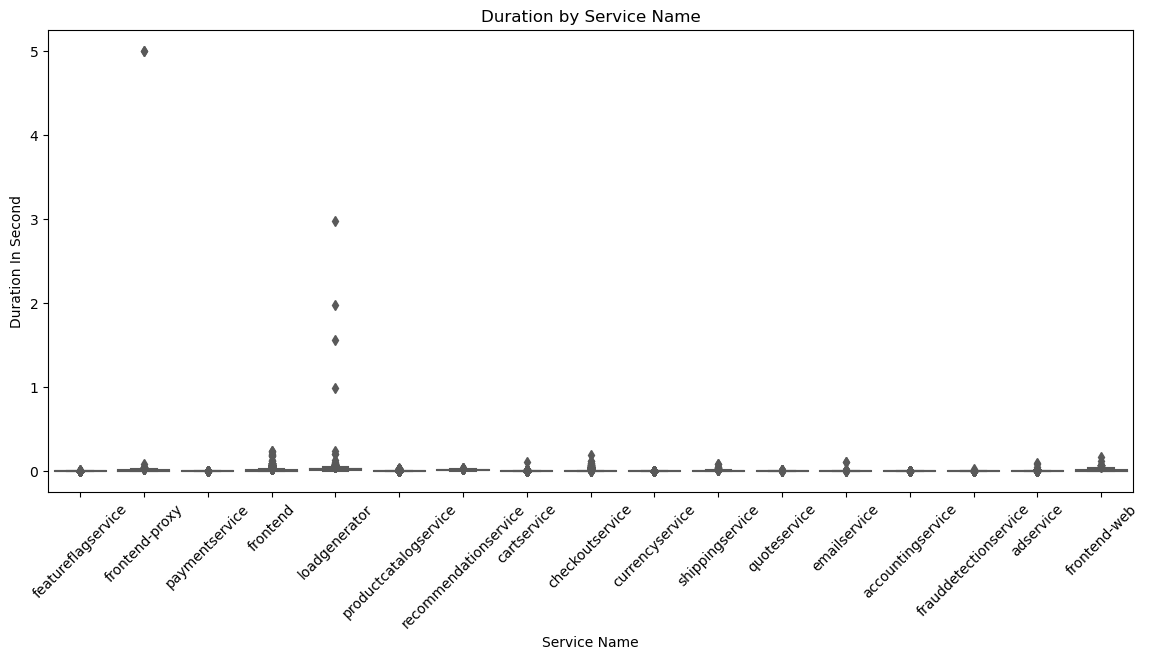

In [41]:
# Duration by Service Name
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='serviceName', y='durationSecond', palette='Set2')  # Adjust 'Set2' to choose a different color palette
plt.title('Duration by Service Name')
plt.xticks(rotation=45)
plt.xlabel('Service Name')
plt.ylabel('Duration In Second')
plt.show()


Conclusion: The 'loadgenerator' service exhibits outliers, with some instances taking up to 3 seconds to complete, but the majority of durations fall between 0 to 1 second.

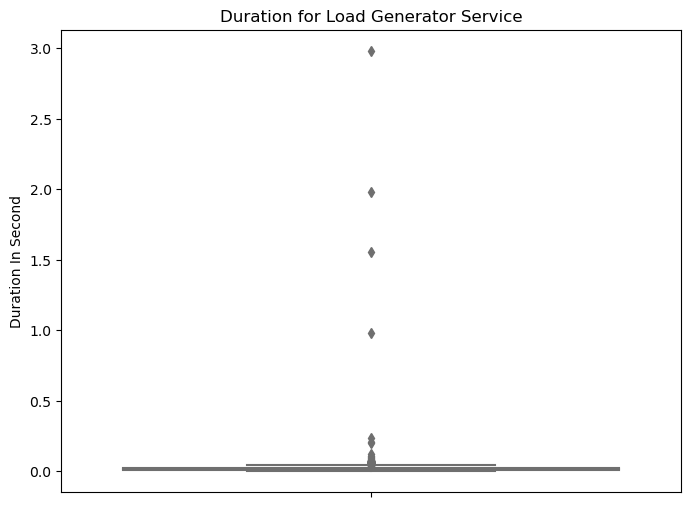

In [42]:
# Filter data for 'loadgenerator' service
loadgenerator_data = data[data.serviceName == 'loadgenerator']

# Plot boxplot for 'loadgenerator' service
plt.figure(figsize=(8, 6))
sns.boxplot(data=loadgenerator_data, y='durationSecond', color='skyblue')
plt.title('Duration for Load Generator Service')
plt.ylabel('Duration In Second')
plt.show()


## **Step 11:** *Check for Outliers in serviceName column*
> Any data point that falls beyond 1.5 times the interquartile range (IQR) below the first quartile (Q1) or 1.5 times the IQR above the third quartile (Q3) can be classified as an outlier.

In [43]:
Q1 = data["durationSecond"].quantile(0.25)
Q3 = data["durationSecond"].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data["durationSecond"] < (Q1 - 1.5 * IQR)) | (data["durationSecond"] > (Q3 + 1.5 * IQR))]
print("Total outliers:", len(outliers))

Total outliers: 18848


In [44]:
outliers

,Timestamp,traceID,spanID,parentSpanID,serviceName,Name,durationNano,Unnamed: 7,durationSecond
3603,2023-11-23 02:34:58,0a4c8b2a204f67623bcfbda629a07fc5,e399d5dba0602199,d1783a9be93930b7,loadgenerator,HTTP GET,2980831627,NaN,2.980832
3605,2023-11-23 02:34:59,605b2ed4e56586df16602ef85673fc83,2da5f946176ae936,d1783a9be93930b7,loadgenerator,HTTP GET,1980473681,NaN,1.980474
3606,2023-11-23 02:34:59,86d69278c14a4670bb1be847e7ea5184,af231ec03fdf53f2,d1783a9be93930b7,loadgenerator,HTTP GET,1556061636,NaN,1.556062
3607,2023-11-23 02:35:00,7ccb42abf04c59bcf42ae9b992bcbbf9,84a19b54e2061b6e,d1783a9be93930b7,loadgenerator,HTTP GET,984197491,NaN,0.984197
3609,2023-11-23 02:35:01,3aeebc9a1f17e194d78f04d14977e58f,b620acf9768c3cd4,d1783a9be93930b7,loadgenerator,HTTP GET,17417895,NaN,0.017418
...,...,...,...,...,...,...,...,...,...
183570,2023-11-23 03:44:51,874439d0e71fc74d17793c547998044c,dddd322b38ef9c1d,d1783a9be93930b7,loadgenerator,HTTP POST,20885994,NaN,0.020886
183571,2023-11-23 03:44:51,874439d0e71fc74d17793c547998044c,c554a8beba0d3053,dddd322b38ef9c1d,frontend,HTTP POST,19646976,NaN,0.019647
183573,2023-11-23 03:44:51,d39c8d5c2028c57812ba31c2f2093b81,322a109a4f8c2b8f,d1783a9be93930b7,frontend,HTTP POST,17287424,NaN,0.017287
183595,2023-11-23 03:44:51,4d45a4d63d5ec0498c01d532d077ef21,efa40483424b6f3d,d1783a9be93930b7,loadgenerator,HTTP GET,19160113,NaN,0.019160


## **Step 12:** *Identify performance differences between Method Names*

In [45]:
data.Name.value_counts()

Name
HTTP GET                                          41311
oteldemo.ProductCatalogService/GetProduct         19453
grpc.oteldemo.ProductCatalogService/GetProduct    15741
HTTP POST                                         12938
HGET                                               8440
                                                  ...  
dns.lookup                                            3
tcp.connect                                           3
documentLoad                                          2
fs existsSync                                         2
documentFetch                                         2
Name: count, Length: 66, dtype: int64

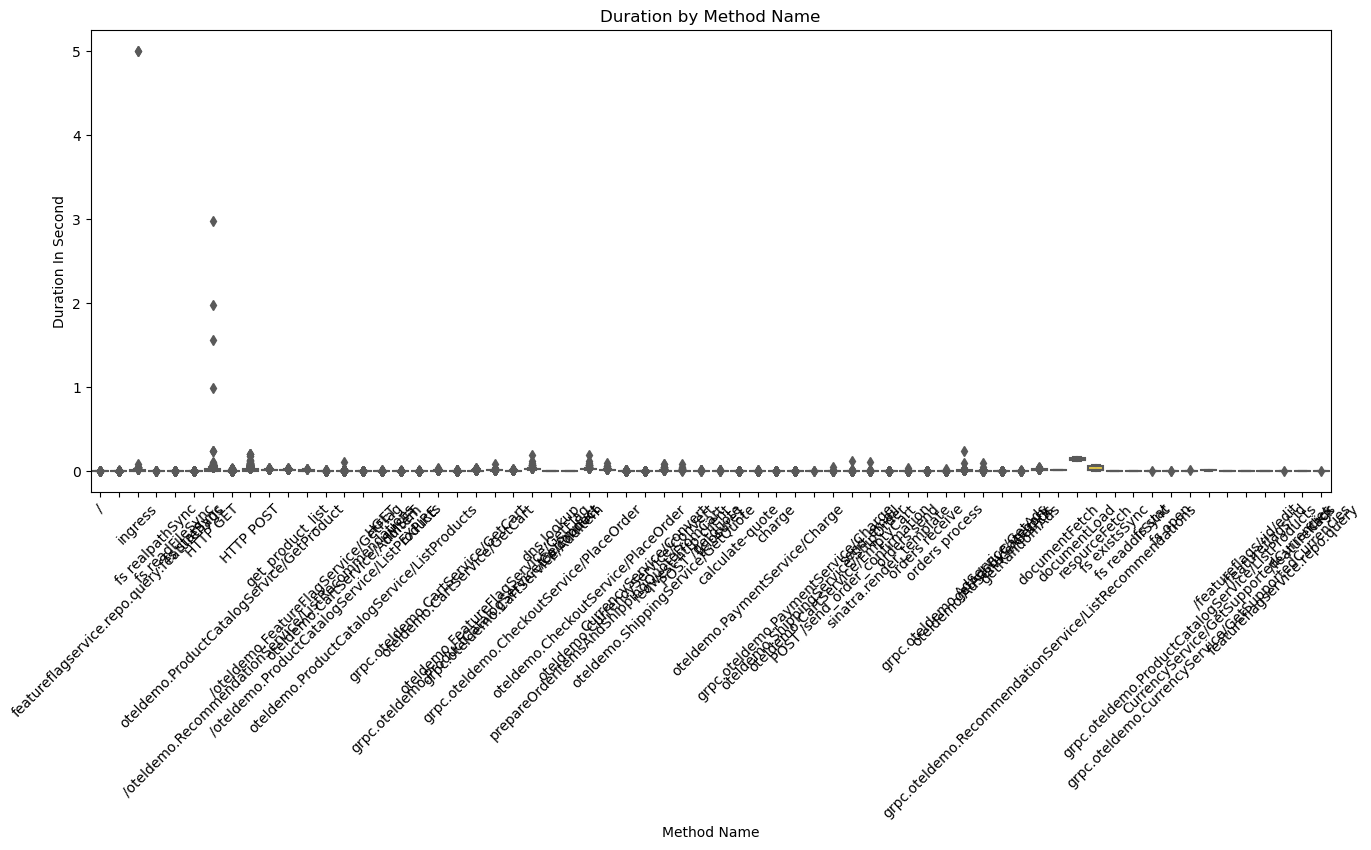

In [46]:
# Duration by Service Name
plt.figure(figsize=(16, 6))
sns.boxplot(data=data, x='Name', y='durationSecond', palette='Set2')  # Adjust 'Set2' to choose a different color palette
plt.title('Duration by Method Name')
plt.xticks(rotation=45)
plt.xlabel('Method Name')
plt.ylabel('Duration In Second')
plt.show()

## **Step 13:** *Visualizing the average time duration of each services*

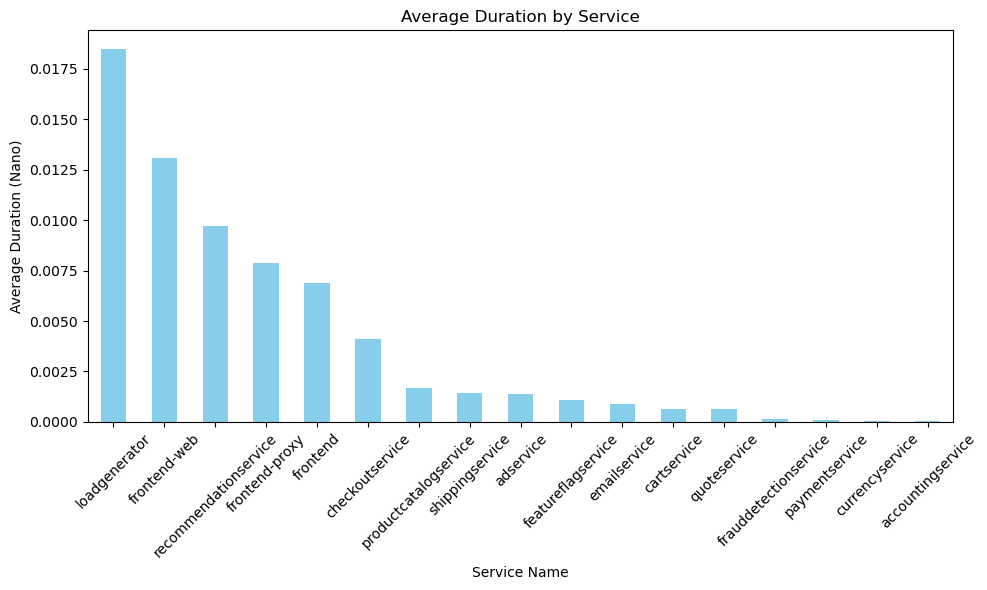

In [49]:
avg_duration_by_service = data.groupby('serviceName')['durationSecond'].mean().sort_values(ascending=False)

# Plot bar graph for average duration by service
plt.figure(figsize=(10, 6))
avg_duration_by_service.plot(kind='bar', color='skyblue')
plt.xlabel('Service Name')
plt.ylabel('Average Duration in second')
plt.title('Average Duration by Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Step 14:** *Visualizing Span Durations by Method Names for Enhanced Anomaly Detection*

In [51]:
services = data['serviceName'].unique()
services

array(['featureflagservice', 'frontend-proxy', 'paymentservice',
       'frontend', 'loadgenerator', 'productcatalogservice',
       'recommendationservice', 'cartservice', 'checkoutservice',
       'currencyservice', 'shippingservice', 'quoteservice',
       'emailservice', 'accountingservice', 'frauddetectionservice',
       'adservice', 'frontend-web'], dtype=object)

> it generates a scatter plot for each microservice separately, categorizing data points based on the method name. This approach provides a clearer understanding of which method might be responsible for any anomalies or increases in span duration.

> The code first extracts unique service names from the DataFrame. Then, it iterates over each service name and filters the DataFrame to obtain data specific to that service. Within each service, it further segregates data based on unique method names.

> For each unique method name within a service, the code plots a scatter plot, where each data point represents a span duration plotted against its timestamp. Different method names are differentiated using different colors.

> By visualizing the scatter plot for each service and method separately, this approach allows for a more granular analysis of span duration patterns and helps in identifying any specific methods that might be contributing to anomalies or variations in duration.

In [55]:
services = data['serviceName'].unique()
services

array(['featureflagservice', 'frontend-proxy', 'paymentservice',
       'frontend', 'loadgenerator', 'productcatalogservice',
       'recommendationservice', 'cartservice', 'checkoutservice',
       'currencyservice', 'shippingservice', 'quoteservice',
       'emailservice', 'accountingservice', 'frauddetectionservice',
       'adservice', 'frontend-web'], dtype=object)

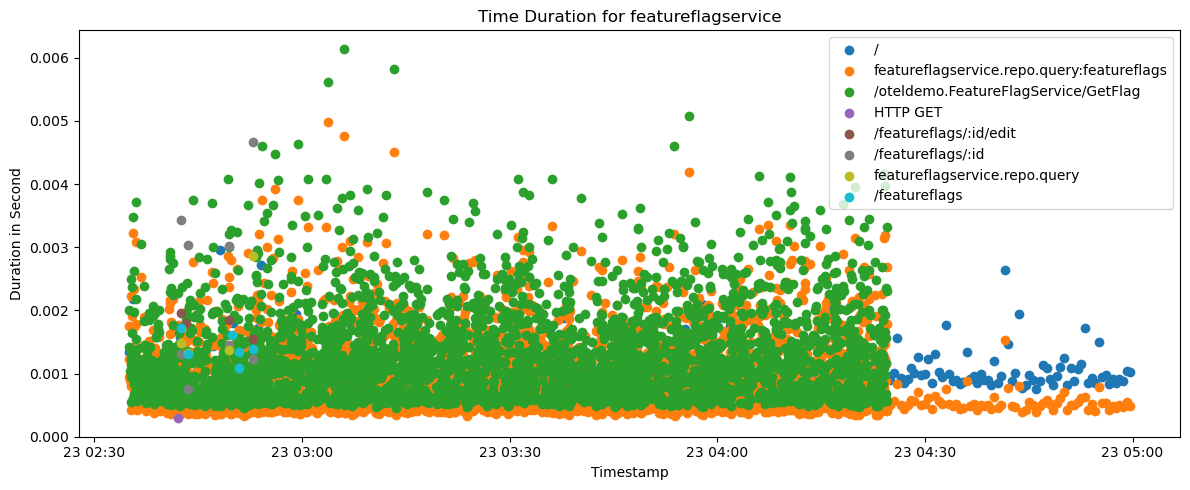

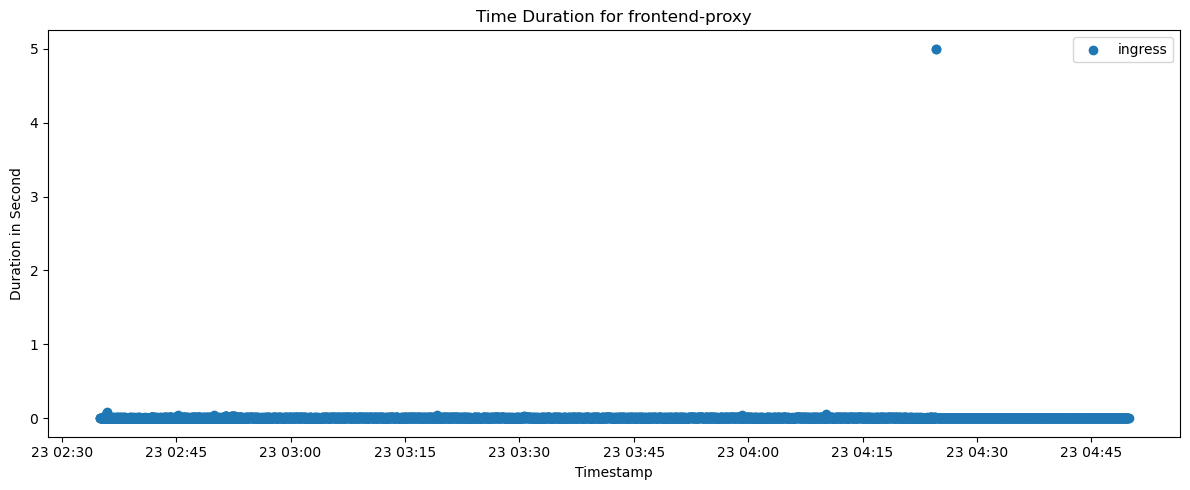

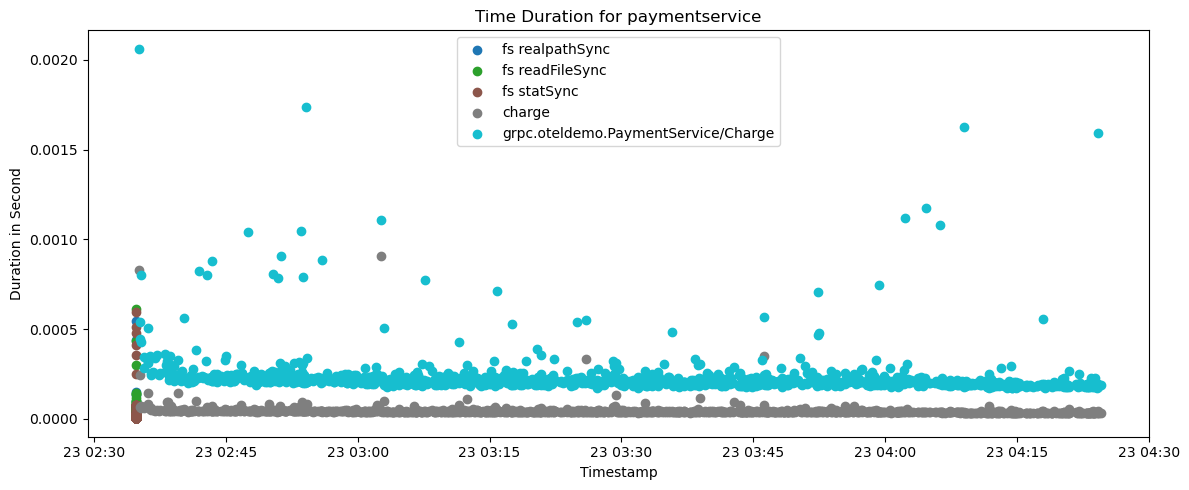

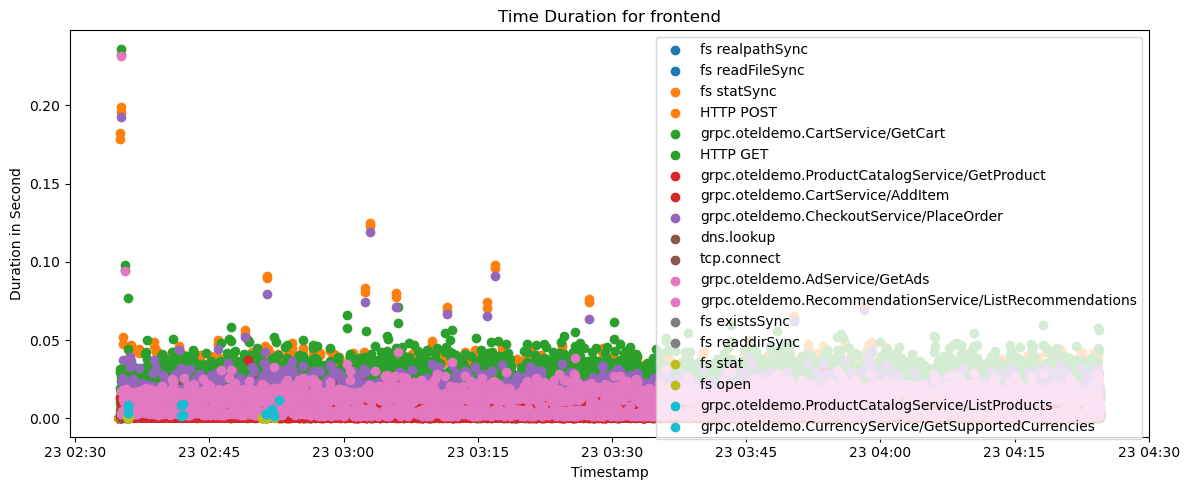

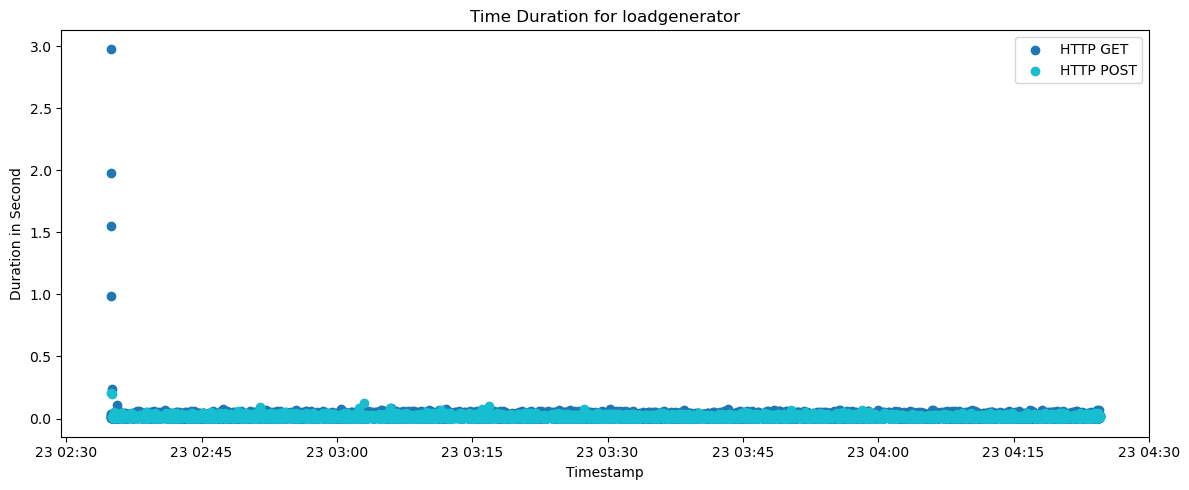

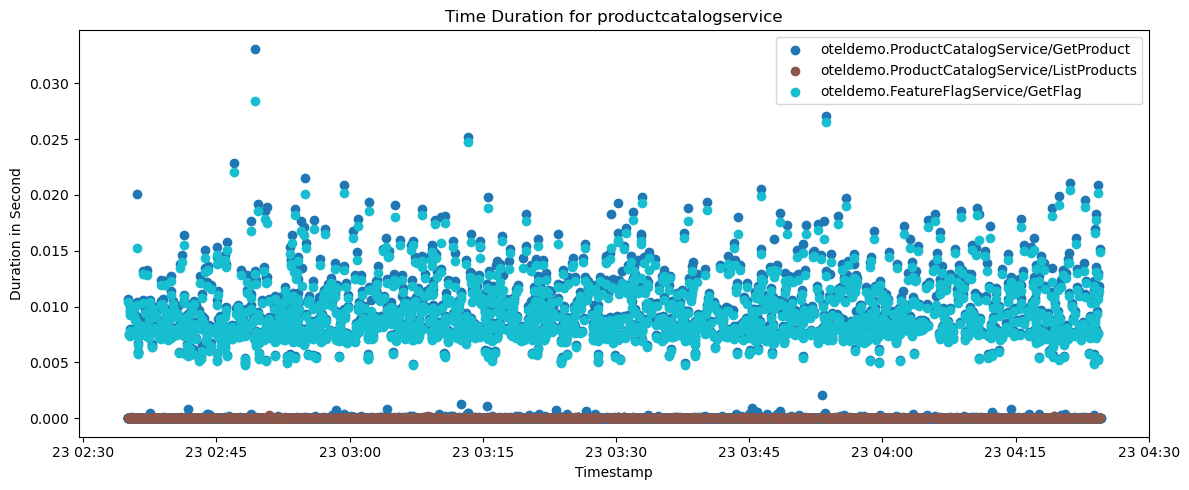

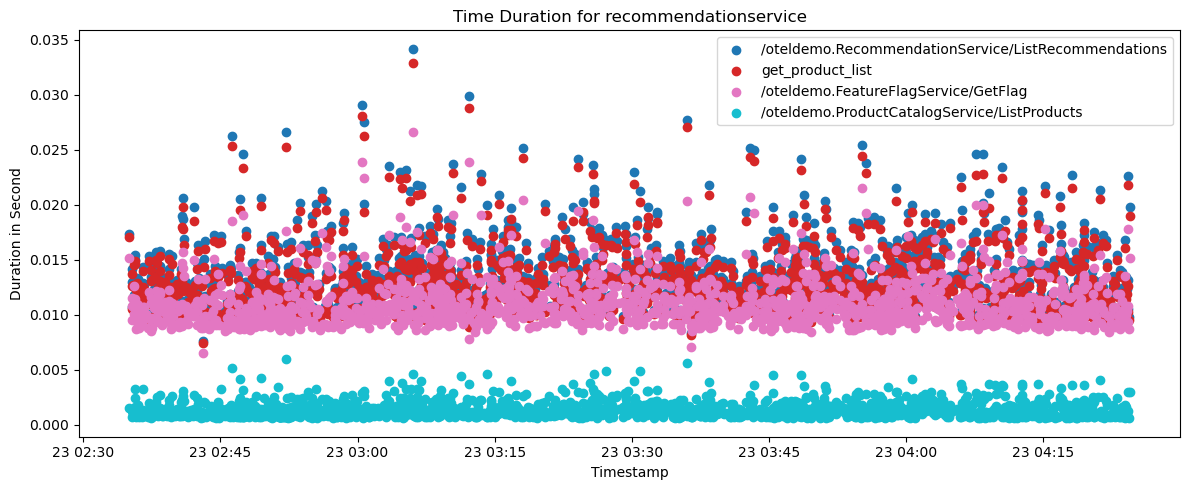

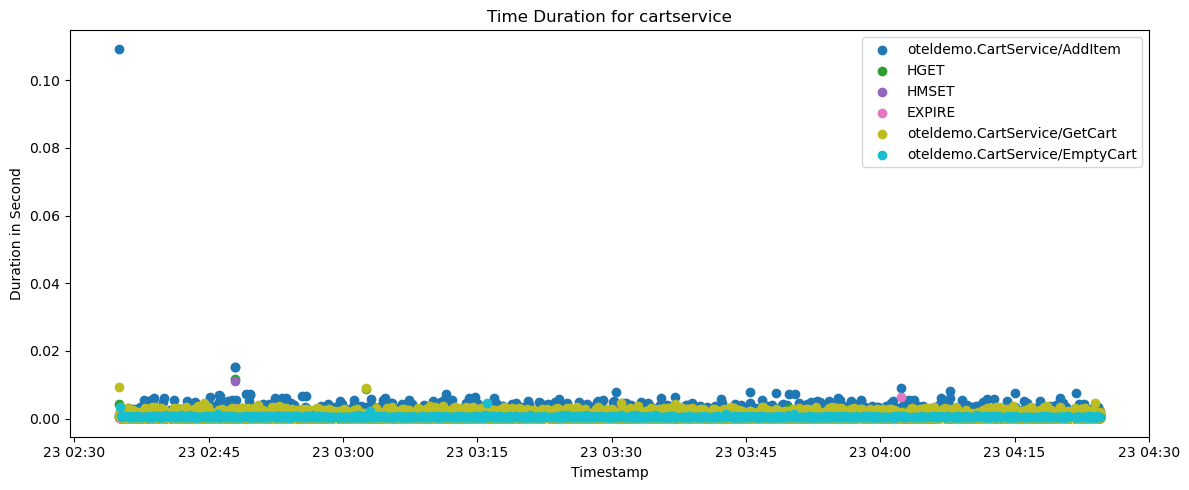

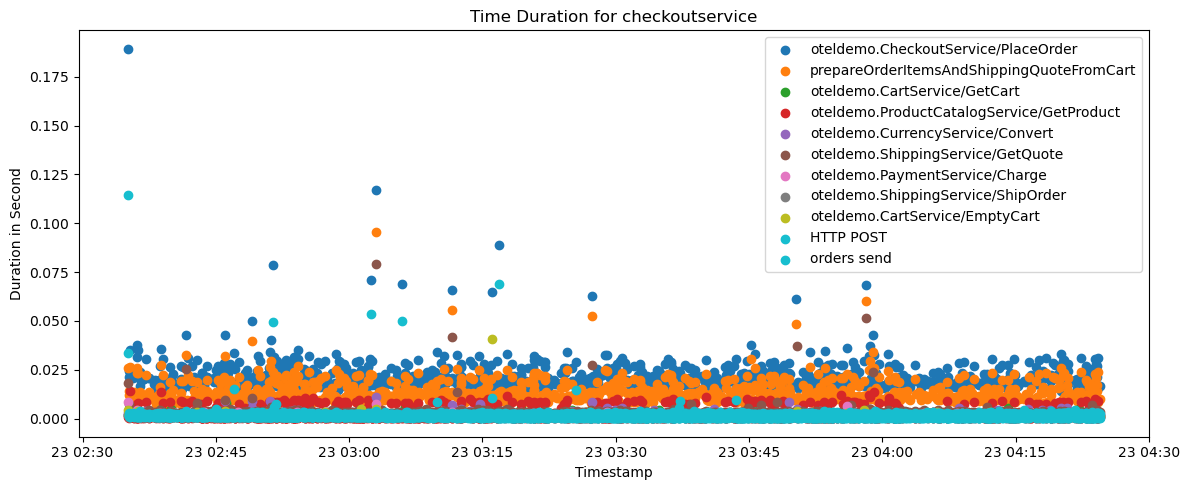

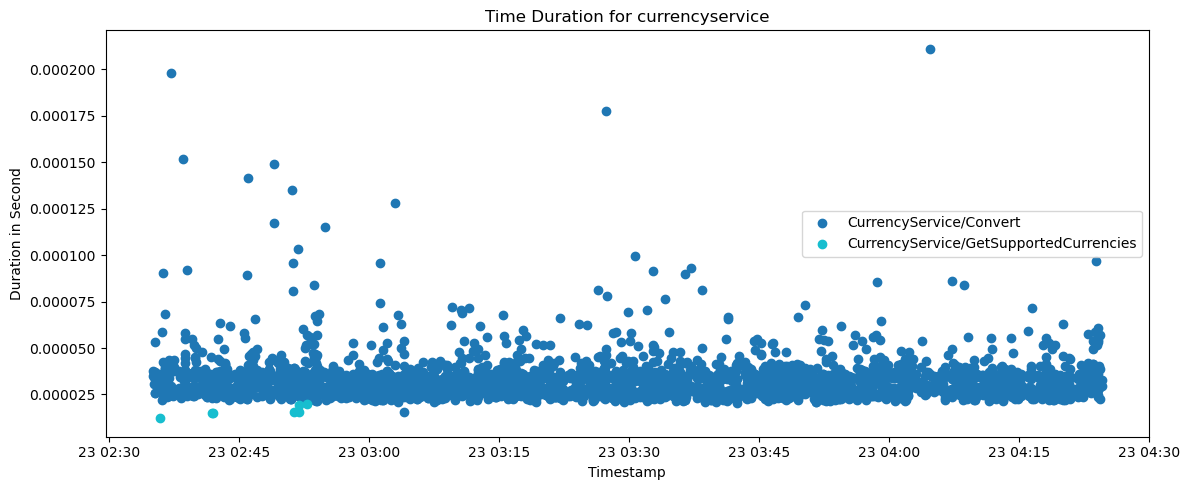

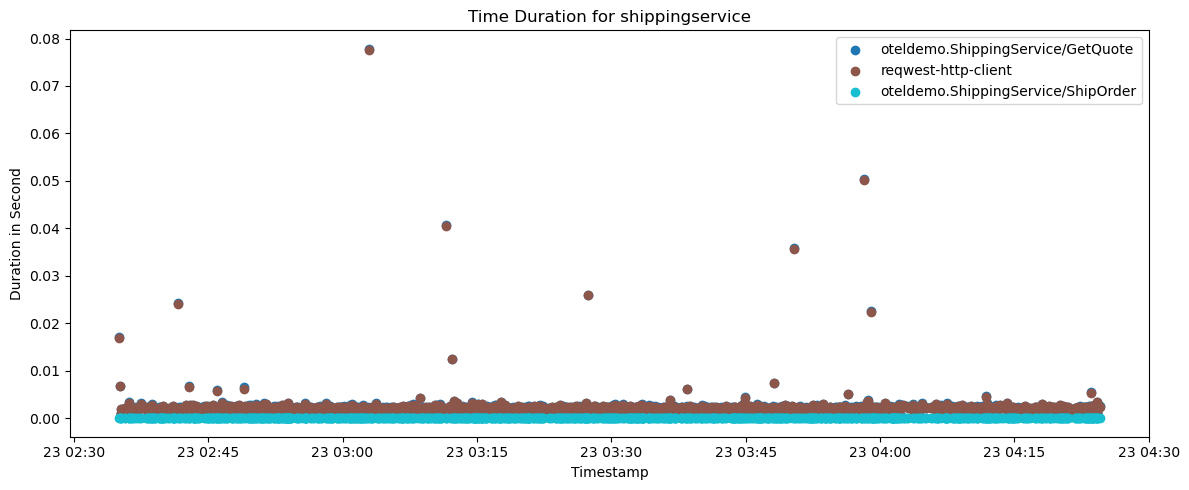

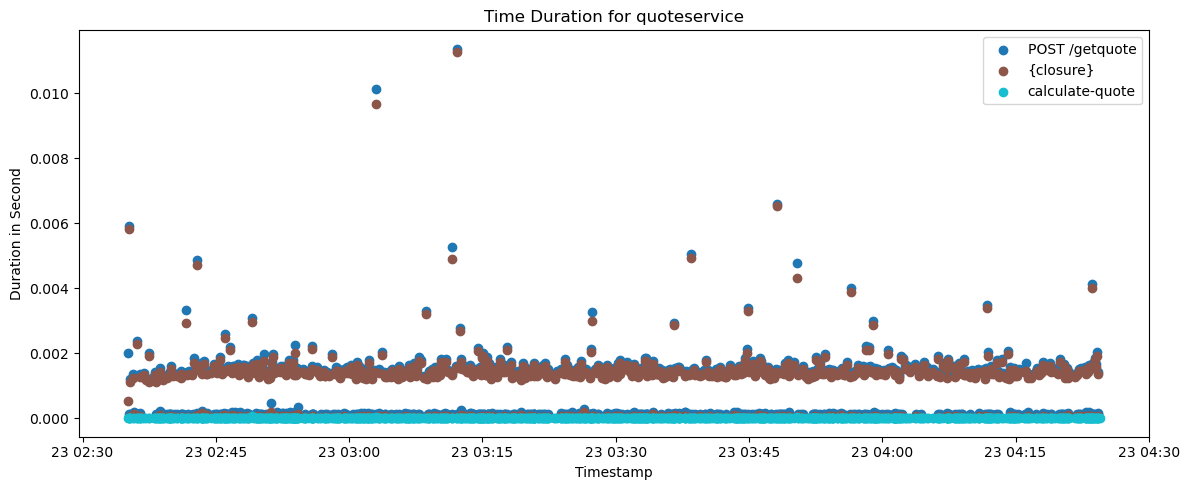

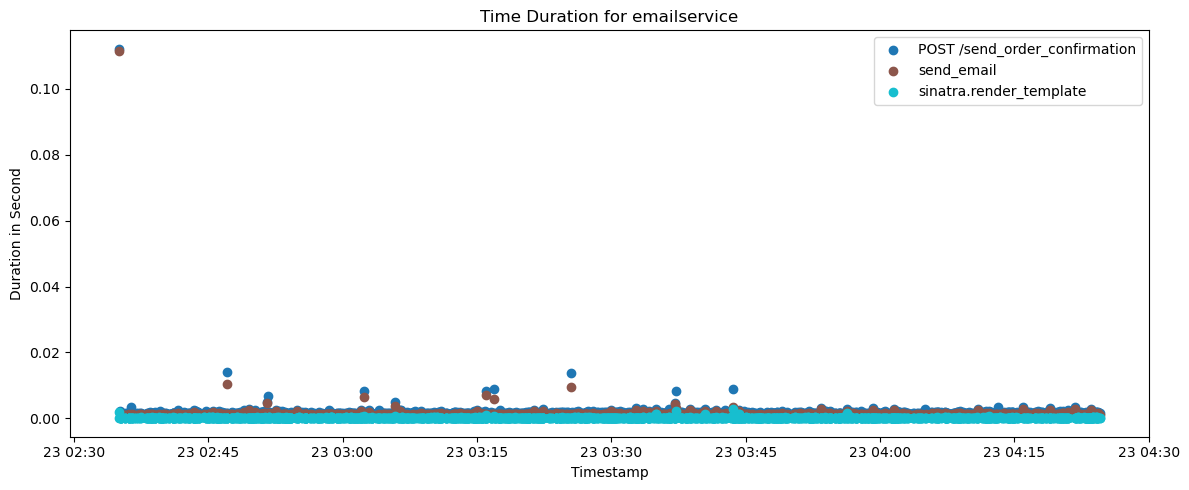

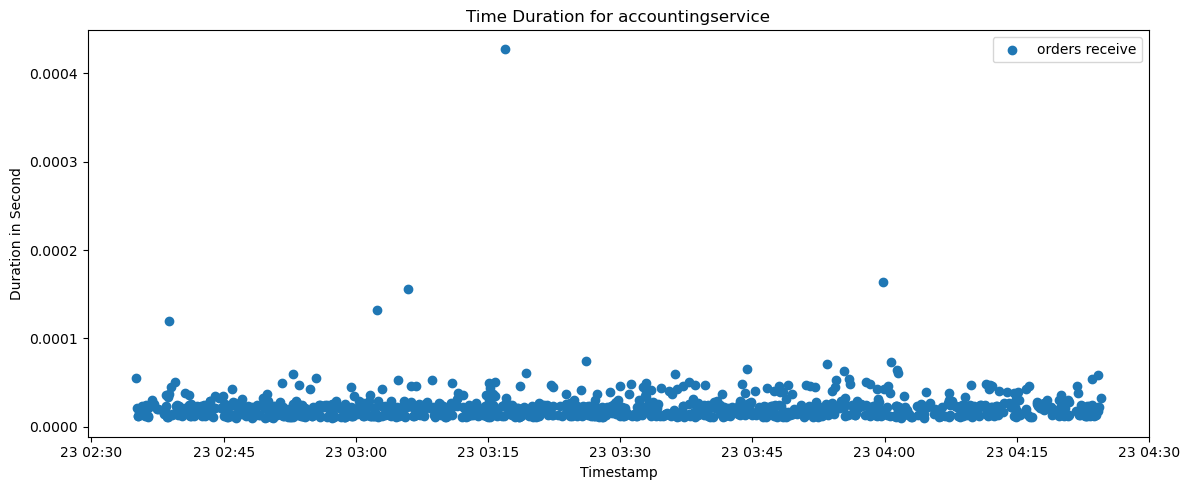

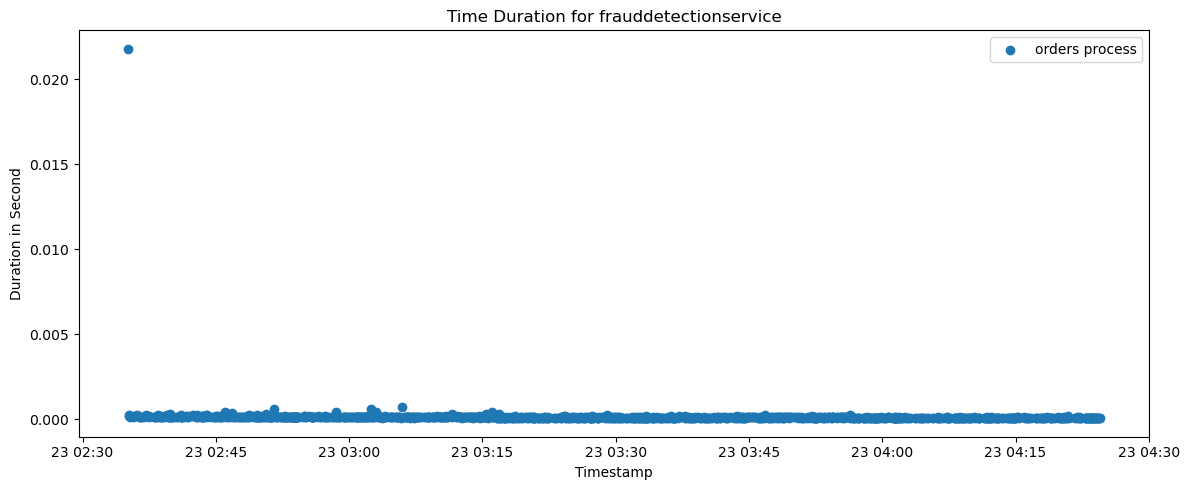

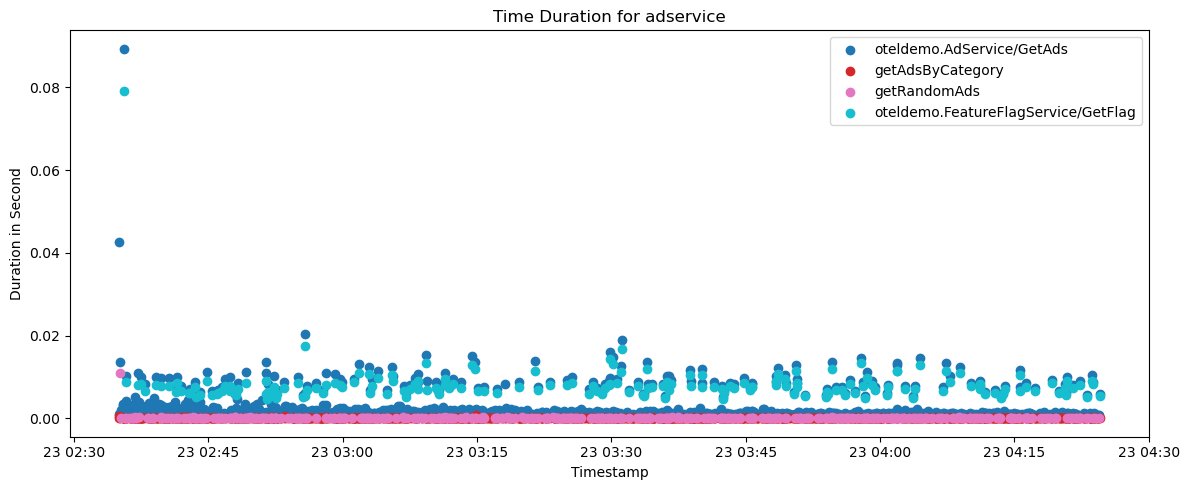

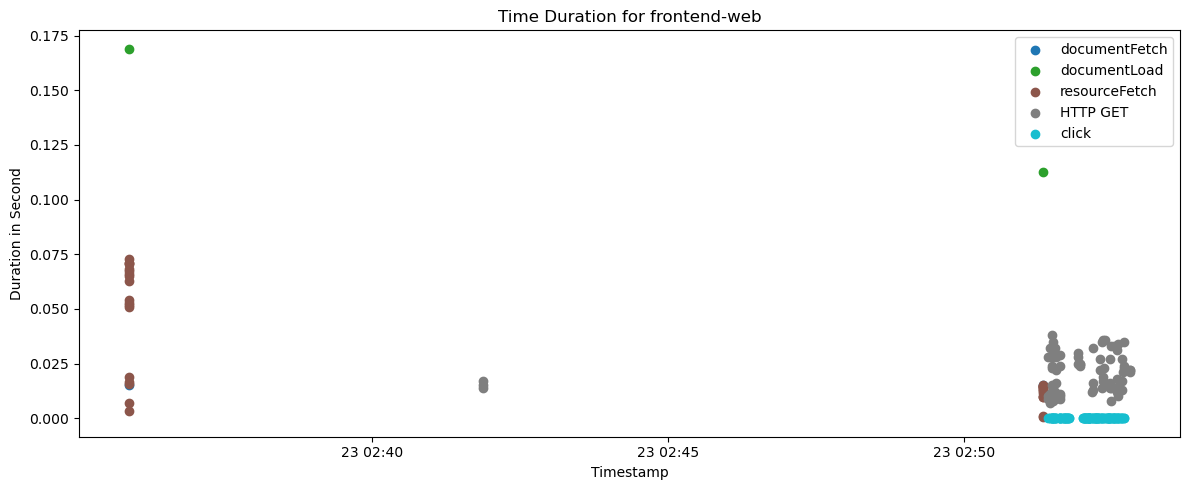

In [60]:
for service in services:
    service_data = data[data['serviceName'] == service]
    method_names = service_data['Name'].unique()
    
    # Define a color palette with enough colors for all unique names
    colors = plt.cm.tab10(np.linspace(0, 1, len(method_names)))
    
    # Plot scatter plot for each method name
    plt.figure(figsize=(12, 5))
    for name, color in zip(method_names, colors):
        name_data = service_data[service_data['Name'] == name]
        plt.scatter(name_data['Timestamp'], name_data['durationSecond'], color=color, label=name)
    
    plt.xlabel('Timestamp')
    plt.ylabel('Duration in Second')
    plt.title('Time Duration for ' + service)
    plt.xticks()
    plt.legend()
    plt.tight_layout()
    plt.show()